Puedes abrir este notebook en Google Colab haciendo clic en el siguiente botón:

<a target="_blank" href="https://colab.research.google.com/github/LuisDanieDiaz/RelativityGravitationAndCosmology/blob/main/notebooks/1.Basic_concepts_of_special_relativity_and_Coordinate_transformations.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

Instalación de librerías necesarias

In [14]:
!pip install -Uq git+https://github.com/LuisDanieDiaz/RelativityGravitationAndCosmology.git

In [8]:
from my_relativity.plots import *

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython import get_ipython

In [10]:
from my_relativity.plots import *
from celluloid import Camera
from IPython.display import HTML

# 1.1. Basic concepts of special relativity 

## 1.1.1. Events, frames of reference and observers

> **Definición:** Evento
> 
> Un evento es una ocurrencia instantánea en un punto específico del espacio.

> **Definición:** Marco de referencia
>
> Un marco de referencia es un sistema para asignar coordenadas a eventos. Este le asigna un tiempo y una posición a cada evento.

> **Definición:** Marco de referencia inercial
>
> Un marco de referencia inercial es un marco de referencia en el que se cumple la primera ley del movimiento de Newton.

Cualquier sistema que se mueva a velocidad constante respecto a un marco de referencia inercial es también un marco de referencia inercial. 

> **Definición:** Observador
>
> Un observador es un individuo dedicado a utilizar un marco de referencia específico para registra eventos.

Puede intuirse el observador como un ser todo poderoso que sabe todo lo que ocurre en el universo. O sea, no tiene que esperar a que, por ejemplo, la luz llegue a él para saber que un evento ocurrió, sino que sabe instantáneamente que ocurrió. Esto, basado en un sistema de referencia específico.

> **Definición:** Observador inercial
>
> Un observador inercial es un observador que usa un marco de referencia inercial.

La teoría de la relatividad especial usa sólo observadores inerciales, por ello dicho nombre, que indica que es una particularización.

# 1.1.2. The postulates of special relativity

Las leyes física son válidas en cualquier parte del universo, o amenos así parece ser, a menos que se establezcan ciertas condiciones extremas. Una pregunta relevante es entonces: ¿Dos observadores inerciales estarán de acuerdo con dicha afirmación?

Incluso antes que se dictaran las leyes de Newton, Galileo y sus contemporáneos advirtieron que es indistinguible la experiencia entre dos sistemas de referencia inerciales. Por ejemplo, podríamos jugar futbol igual en la playa, que en un barco con movimiento rectilíneo uniforme.

Si encerramos a un físico, experto en mecánica, en un barco dichas características, sería incapaz de distinguir si se encuentra abandonado en una isla desierta, o a bordo de un crucero. 

Estas nociones son las bases de la primera teoría de la relatividad: **La relatividad Galileana**, que nos dice que, en efecto, dos observadores inerciales están de acuerdo con las leyes mecánicas.

Einstein por su parte, creía que todas las leyes físicas coincidir en diferentes sistemas de referencias inerciales, no sólo la mecánica. Y basado en lo conocido por la física en su momento, declaró 2 postulados sobre los que se basa su teoría de la relatividad especial.

> **Primer postulado de la relatividad especial. (Principio de relatividad)**
>
> Las leyes físicas se pueden escribir de la misma forma en todos los marcos inerciales.

> **Segundo postulado de la relatividad especial. (Principio de constancia de la velocidad de la Luz)**
>
> La velocidad de la luz en el vacío tienen el mismo valor constante en todos los marcos de referencia inerciales.

Estos dos postulados, son la piedra angular de la teoría de la relatividad, y tienen implicaciones que nadie habría imaginado.

# 1.2. Coordinate transformations

Una teoría de la relatividad, tiene como objetivo describir cómo se relacionan las observaciones dados dos marcos de referencia. En el caso de la relatividad especial, estos observadores son inerciales, es decir, se mueven a velocidad constante entre sí.

Dado que trabajaremos bajo este concepto, es muy útil definir una **Configuración estándar**, que usaremos constantemente.

> Definición: **Configuración estándar**
> 
> Dados dos sistemas de referencia $S$ y $S'$:
> - $S'$ es inercial respecto a S y se mueve con velocidad $V$ respecto a $S$ a lo largo del eje $x$.
> - Los correspondientes ejes de coordenadas son $x$, $y$, $z$ y $x'$, $y'$, $z'$ son paralelos.
> - El origen de $S'$ coincide con el origen de $S$ en el instante inicial $t = t' = 0$.

Trabajaremos en un sistema con coordenadas $(t, x, y, z)$ para el sistema $S$ y $(t', x', y', z')$ para el sistema $S'$.

In [11]:
frame = Frame_3D(figsize=(5,5), title="Configuración estándar")
camera = Camera(frame.fig)

velocity = 1  # Velocity of the moving coordinate system

frame.ax.view_init(elev=30, azim=45)
S1 = Coordinate_system_3D(frame, origin=[0, 0, 0])
S2 = Coordinate_system_3D(frame, origin=[0, 0, 0], name_cs="S'", name_axis=["X'", "Y'", "Z'", "t'"], alpha=0.8)

for time in np.linspace(0, 2, 20):
    S2.origin = [time*velocity, 0, 0]

    S1.time = round(time, 3)
    S2.time = round(time, 3)
    
    S1.drawn()
    S2.drawn()

    camera.snap()  # Capture the current frame

plt.close(frame.fig)  # Close the figure to avoid displaying it twice

In [12]:
# Create the animation
ani = camera.animate(blit=True, interval=100, repeat=True, repeat_delay=1000)
HTML(ani.to_jshtml())

## 1.2.1. The Galilean transformations

Anterior al desarrollo de una teoría moderna de relatividad, se tomaban ciertas asunciones para describir el movimiento de los cuerpos, como por ejemplo, que el tiempo es el mismo para todos los observadores. Estas son las transformaciones galileanas, que parecen ser intuitivas.

> **Transformaciones Galileanas**
>
> Con una configuración estándar, las transformaciones entre los sistemas de referencia $S$ y $S'$ son:
> - $t' = t$
> - $x' = x - Vt$
> - $y' = y$
> - $z' = z$

el problema es que la asunción de que el tiempo es el mismo para todos los observadores no es cierta, por lo que es necesario aplicar una transformación diferente para describir el movimiento de los cuerpos, y hacerlo compatible con las leyes de la física.

In [162]:
class Frame_2D:
    def __init__(self, figsize:tuple=(6,6), title:str='', show_title:bool=True, xlims:tuple=(-2.5, 2.5), ylims:tuple=(-2.5, 2.5)):
        """
        Create a 2D figure with a specific size and remove the background.
        @param figsize: Tuple with the size of the figure.
        @param title: Title of the figure.
        @param shoe_title: Show the title of the figure.
        """
        self.title = title
        self.show_title = show_title
        self.xlims = xlims
        self.ylims = ylims

        self.fig, self.ax = plt.subplots(figsize=figsize)
        
        self.quit_background()

        # Limit of the axes
        self.ax.set_xlim(*self.xlims)
        self.ax.set_ylim(*self.ylims)
        # self.ax.set_aspect('auto')

        # Quit the grid and ticks
        self.ax.grid(False)

        # title
        if self.show_title: self.ax.set_title(self.title, fontsize=16)

    def quit_background(self):
        """
        Remove the background of the figure.
        """
        # Remove the background color
        self.ax.set_facecolor('white')
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['right'].set_visible(False)
        self.ax.spines['left'].set_visible(False)
        self.ax.spines['bottom'].set_visible(False)



In [163]:
from matplotlib.patches import FancyArrow
class Coordinate_system_2D:
    def __init__(self, frame, origin=[0,0], size=1, 
                 name_cs='S', name_axis=['X', 'Y'], 
                 show_names=True, show_name_cs=True, alpha=1):
        """
        Create a 2D coordinate system.
        @param frame: Frame_2D object where the coordinate system will be drawn.
        @param origin: Origin of the coordinate system.
        @param size: Size of the coordinate system.
        @param name_cs: Name of the coordinate system.
        @param nombres_ejes: Names of the axes.
        """
        self.frame = frame
        self.origin = origin
        self.size = size
        self.name_cs = name_cs
        self.name_axis = name_axis
        self.show_names = show_names
        self.show_name_cs = show_name_cs
        self.alpha = alpha
        self.frame = frame
        self.origin = origin
        self.size = size
        

    def drawn(self):
        """
        Draw the coordinate system in the frame.
        """
        # axis
        arrow_x = FancyArrow(*self.origin, self.size, 0, color='r', alpha=self.alpha, width=0.02, zorder=1)
        arrow_y = FancyArrow(*self.origin, 0, self.size, color='g', alpha=self.alpha, width=0.02, zorder=1)

        self.frame.ax.add_patch(arrow_x)
        self.frame.ax.add_patch(arrow_y)

        self.show_name_axis()
        self.show_name_coordinate_system()

    def show_name_axis(self):
        """
        Draw the names of the axes in the frame.
        """
        if self.show_names:
            self.frame.ax.text(self.origin[0] + self.size*1.15, self.origin[1], self.name_axis[0], color='r', alpha=self.alpha)
            self.frame.ax.text(self.origin[0], self.origin[1] + self.size*1.15, self.name_axis[1], color='g', alpha=self.alpha)
            # self.frame.ax.text(self.origin[0] - 0.2, self.origin[1], self.origin[1] + 1, 't', color='k', alpha=self.alpha)

    def show_name_coordinate_system(self):
        """
        Draw the name of the coordinate system in the frame.
        """
        # if self.show_name_cs:
        #     self.frame.ax.text(self.origin[0]-0.2, self.origin[1], self.origin[1], self.name_cs, color='black', fontsize=12, ha='center', va='center', alpha=self.alpha)

            

In [ ]:
import matplotlib
class Image_2D:
    def __init__(self, frame, image_path:str, origin=[0,0], zoom=0.1, alpha=1):
        """
        Create a 2D image.
        @param frame: Frame_2D object where the image will be drawn.
        @param image_path: Path of the image.
        @param origin: Origin of the image.
        @param size: Size of the image.
        """
        self.frame = frame
        self.image_path = image_path
        self.origin = origin
        self.zoom = zoom
        self.alpha = alpha

        self.img = None
        self.imgBox = None
        self.imgBoxGraph = None

        self.update()

    def update(self):
        """
        Update the image in the frame.
        """
        self.img = matplotlib.image.imread(self.image_path)
        self.imgBox = matplotlib.offsetbox.OffsetImage(self.img, zoom=self.zoom)
        self.imgBoxGraph = matplotlib.offsetbox.AnnotationBbox(self.imgBox, self.origin, frameon=False, pad=0.0)

    def drawn(self, zorder=-1):
        """
        Draw the image in the frame.
        """
        self.update()
        self.frame.ax.add_artist(self.imgBoxGraph)
        self.imgBoxGraph.set_zorder(zorder)

NotImplementedError: cannot remove artist

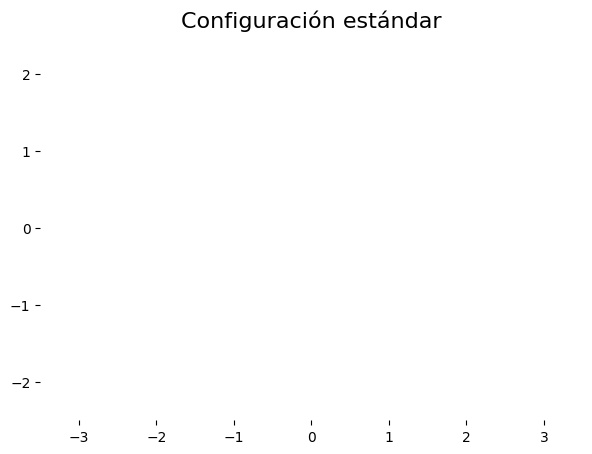

In [208]:
frame = Frame_2D(figsize=(7,5), title="Configuración estándar", xlims=(-3.5, 3.5))
camera = Camera(frame.fig)

S1 = Coordinate_system_2D(frame, origin=[0, 0], name_cs='S', name_axis=['X', 'Y'], alpha=0.5)
S2 = Coordinate_system_2D(frame, origin=[0, 0], name_cs="S'", name_axis=["X'", "Y'"], alpha=0.5)


boat = Image_2D(frame, image_path="images/boat.jpg", origin=np.array([-0.63, -0.1]), zoom=0.2, alpha=1)
cannon = Image_2D(frame, image_path="images/cannon.png", origin=np.array([0.,0.]), zoom=0.06, alpha=1)

# posición de la pelota 
x = 0
y = 0
ball = Image_2D(frame, image_path="images/ball.png", origin=np.array([0,0]), zoom=0.03, alpha=1)

velocity = 1  # Velocidad del sistema de coordenadas en movimiento
divisions = 20  # Número de divisiones en el tiempo
dtime = 1/divisions  # Incremento de tiempo
for time in np.linspace(0, 2, 20):
    S2.origin = [-time*velocity, 0]
    boat.origin[0] -= dtime*velocity
    cannon.origin[0] -= dtime*velocity

    boat.drawn()
    cannon.drawn()
    ball.drawn(zorder=1)

    # S1.drawn()
    # S2.drawn()

    camera.snap()  # Capture the current frame
# plt.close(frame.fig)  # Close the figure to avoid displaying it twice


# plt.show()



In [209]:
animation = camera.animate(blit=True, interval=100, repeat=True, repeat_delay=1000)
HTML(animation.to_jshtml())

## 1.2.2 The Lorentz transformations

Dado que el problema surge de tomar como cierto algunas sentencias infundadas, Einstein se basó en dos postulados, de los que se deducen las transformaciones. Si embargo, dicho resultado ya había sido obtenido por Lorentz, en un contexto diferente, por lo que llevan su nombre. Estas son dichas transformaciones:

> **Transformaciones de Lorentz**
> 
>  Con una configuración estándar, las transformaciones entre los sistemas de referencia $S$ y $S'$ son:
> - $t' = \frac{\left( t - \frac{V}{c^2} x \right)}{\sqrt{1 - \frac{V^2}{c^2}}} $
> - $x' = \frac{(x - Vt)}{\sqrt{1 - \frac{V^2}{c^2}}} $
> - $y' = y$
> - $z' = z$

Estas transformaciones son diferentes a las galileanas, pues muestran un tiempo no absoluto, y a demás, una mezcla entre el espacio y el tiempo inseparable, el tiempo primado depende tanto del tiempo del sistema no primado, como de la posición.

Adicionalmente, el factor $\sqrt{1 - \frac{V^2}{c^2}}$ es conocido como el **factor de Lorentz** y se denota como $\gamma(V)$, en donde se enfatiza que dicho factor es dependiente de la velocidad relativa entre los sistemas de referencia.

> **Transformaciones de Lorentz con factor de Lorentz**
>
> Con una configuración estándar, las transformaciones entre los sistemas de referencia $S$ y $S'$ son:
> - $t' = \gamma(V) \left( t - \frac{V}{c^2} x \right)$
> - $x' = \gamma(V) (x - Vt)$
> - $y' = y$
> - $z' = z$

Para velocidades mucho menores a la de la luz, $V \ll c$, el factor de Lorentz se puede aproximar como $\gamma(V) \approx 1$, por lo que las transformaciones de Lorentz se convierten en las galileanas.Por otra parte, a medida que se acerca a la velocidad de la luz, $V \to c$, el factor de Lorentz se vuelve muy grande y toma mucha más relevancia.

### Representaciones de las transformaciones de Lorentz

Dado que las transformaciones de Lorentz son muy relevantes, se pueden representar de diferentes maneras. En representación matricial por ejemplo:

$$\begin{pmatrix}
c t' \\
x' \\
y' \\
z'
\end{pmatrix}
=
\begin{pmatrix}
\gamma(V) & -\gamma(V) V/c & 0 & 0 \\
-\gamma(V) V/c & \gamma(V) & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
c t \\
x \\
y \\
z
\end{pmatrix}
$$

Se multiplica $t'$ por $c$ para tener las mismas unidades.

También se puede representar como:

$$
[x'^\mu] = [\Lambda^{\mu}_{\ \ \nu}] [x^\nu]
$$

Donde:
$
[x'^\mu] \equiv \begin{pmatrix}
ct' \\
x' \\
y' \\
z'
\end{pmatrix}
$,
$
[x^\nu] \equiv \begin{pmatrix}
ct \\
x \\
y \\
z
\end{pmatrix}
$ y
$
[\Lambda^{\mu}_{\ \ \nu}] \equiv \begin{pmatrix}
\gamma(V) & -\gamma(V) V/c & 0 & 0 \\
-\gamma(V) V/c & \gamma(V) & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$.

Además, los indices griegos indican que iteran entre 0 y 3, mientras que los índices latinos iteran entre 1 y 3.

- $[x^\mu]$ es también conocido como el **4-vector posición**.

Otra forma de representar la transformación es:
$$
x'^\mu = \sum_{\nu=0}^{3}\Lambda^{\mu}_{\ \ \nu} x^\nu
$$

#### Transformaciones de Lorentz inversas

Es fácil ver que las transformaciones de Lorentz son invertibles, y la inversa de la transformación de Lorentz es la transformación de Lorentz para $-V$.

> **Transformaciones de Lorentz inversas**
> - $t = \gamma(-V) \left( t' + \frac{V}{c^2} x' \right)$
> - $x = \gamma(-V) (x' + Vt')$
> - $y = y'$
> - $z = z'$

## 1.2.3 A derivation of the Lorenz transformation

### Deducción

Derivemos la transformación de Lorenz.

Supongamos que tenemos la configuración estándar e ignoremos los ejes $y$ y $z$. En este caso, asumamos que la transformación se desarrolla en términos de estas dos variables:

$$
\begin{align*}
x' &= a_0 + a_1 x + a_2 t  + a_3 x^2 + a_4 t^2 + \cdots \\
t' &= b_0 + b_1 x + b_2 t  + b_3 x^2 + b_4 t^2 + \cdots
\end{align*}
$$

Si suponemos que en $t=0, t'=0$ y $x=0, x'=0$, entonces:

$$
\begin{align*}
x'=0 &= a_0 + a_1 (0) + a_2 (0)  + a_3 (0)^2 + a_4 (0)^2 + \cdots \\
t'=0 &= b_0 + b_1 (0) + b_2 (0)  + b_3 (0)^2 + b_4 (0)^2 + \cdots
\end{align*}
$$

Esto es: $a_0=0$ y $b_0=0$. De modo que la transformación se reduce a:
$$
\begin{align*}
x' &= a_1 x + a_2 t  + a_3 x^2 + a_4 t^2 + \cdots \\
t' &= b_1 x + b_2 t  + b_3 x^2 + b_4 t^2 + \cdots
\end{align*}
$$

Ahora, si tomando en cuenta que las leyes de newton son invariantes bajo la transformación, podemos ver lo que pasa con la fuerza. 

Asumamos que un objeto se mueve con movimiento rectilíneo uniforme a lo largo del eje $x$ partiendo desde el origen. Entonces, la posición del objeto en el sistema de referencia $S$ es:

$$
x = v_0 t
$$

Esta solución indica que no hay fuerzas actuando sobre el objeto. Dado que las leyes de newton son invariantes bajo la transformación, entonces la fuerza en el sistema $S'$ también debe ser cero. Por lo tanto, la posición del objeto en el sistema de referencia $S'$ es de la forma:
$$
x' = v_0' t'
$$

Esto es:

$$
\begin{align*}
    x' &= a_1 (v_0 t) + a_2 t  + a_3 (v_0 t)^2 + a_4 t^2 + \cdots \\
    &= (a_1 v_0 + a_2) t + (a_3 v_0^2 + a_4) t^2 + \cdots \\
    t' &= b_1 (v_0 t) + b_2 t  + b_3 (v_0 t)^2 + b_4 t^2 + \cdots \\
    &= (b_1 v_0 + b_2) t + (b_3 v_0^2 + b_4) t^2 + \cdots
\end{align*}
$$

Observe que si los términos de orden superior a 1 no tienen como coeficiente cero, entonces la transformación no es lineal. y no se cumple que $x' = v_0' t'$. Para poner un ejemplo, supongamos que $t' =  \alpha t$, en tal caso:

$$
\begin{align*}
\frac{dx'}{dt'} &= \frac{1}{\alpha} \frac{dx'}{dt} \\
\alpha \frac{dx'}{dt'} &= (a_1 v_0 + a_2) + 2(a_3 v_0^2 + a_4) t + \cdots \\
\alpha^2 \frac{d^2x'}{dt'^2} &= 2(a_3 v_0^2 + a_4) t \neq 0
\end{align*}
$$
Esto es, la aceleración no es cero, o sea, que no se cumple la invariabilidad de las leyes de Newton. Por lo que la transformación tiene términos nulos para $O(x^2)$ y $O(t^2)$.

De este modo, la transformación se reduce a:

$$
x' = a_1 x + a_2 t \\
t' = b_1 x + b_2 t
$$

A continuación procederemos a determinar los coeficientes $a_1, a_2, b_1$ y $b_2$. 

**Despeje de $a_2$:**

Si suponemos que $x = Vt$ de modo que que $V$ es la velocidad del marco de referencia $S'$ respecto al marco de referencia $S$. Entonces, es claro que x'=0, puesto que por definición $S'$ se mueve con velocidad $V$ respecto a $S$. Por lo que:
$$
0 = a_1 (Vt) + a_2 t \Rightarrow a_2 = -a_1 V
$$

**Despeje de $b_2$:**

teniendo este resultado, y dividiendo las transformaciones:
$$
\frac{x'}{t'} = \frac{a_1 x - a_1 V t}{b_1 x + b_2 t}
$$

Ahora, si cambiamos de marco de referencia. Cuando $x=0$, $x' = -V t'$, por lo que:
$$
\frac{-Vt'}{t'} = \frac{-V(a_1t)}{(b_2 t)}
$$
se concluye que  $a_1 = b_2$.

De este modo, la transformación se reduce a:
$$
\begin{align*}
    x' &= a_1 x - a_1 V t \\
    t' &= b_1 x + a_1 t \\
\end{align*}
$$

**Despeje de $b_1$:**


Sabemos que la velocidad de la luz debe ser la misma en ambos sistemas de referencia. Por lo que si $x = ct$ y $x' = ct'$, luego, $x/t = x'/t' = c$. Por lo que:
$$
\begin{align*}
\frac{x'}{t'} &= \frac{t(a_1 \frac{x}{t} - a_1 V)}{t(b_1 \frac{x}{t} + a_1)} \\
&= \frac{a_1 \frac{x}{t} - a_1 V}{b_1 \frac{x}{t} + a_1} \\
c &= \frac{a_1 c - a_1 V}{b_1 c + a_1} \\
\end{align*}
$$

Si despejamos $b_1$:
$$
\begin{align*}
c (b_1 c + a_1) &= a_1 c - a_1 V \\
b_1 c + a_1  &= a_1 - a_1 V/c \\
b_1 c &= - a_1 V/c \\
b_1 &= - \frac{a_1 V}{c^2}
\end{align*}
$$

por lo que la transformación se reduce a:
$$
\begin{align*}
    x' &= a_1(x - V t) \\
    t' &= a_1(- \frac{V}{c^2} x + t) \\
\end{align*}
$$

**Hallando $a_1$:**

Está claro que la transformación inversa es:
$$
\begin{align*}
    x &= a_1(x' + V t') \\
    t &= a_1(\frac{V}{c^2} x' + t') \\
\end{align*}
$$
Por lo que:
$$
\begin{align*}
x' &= a_1(x - V t) \\
&= a_1(\left[a_1(x' + V t')\right] - V \left[a_1(\frac{V}{c^2} x' + t')\right]) \\
&= a_1^2\left[x' + V t' - \frac{V^2}{c^2} x' - V t'\right] \\
&= a_1^2\left[1 - \frac{V^2}{c^2}\right] x' \\
\end{align*}
$$

De donde llegamos a la conclusión de que:
$$
a_1 = \frac{1}{\sqrt{1 - \frac{V^2}{c^2}}}
$$

Este $a_1$ lo llamaremos el **factor de Lorenz** $\gamma(V)$ 

### Resultado

Así, el resultado final es:
$$
\begin{align*}
    x' &= \gamma(V)(x - V t) \\
    t' &= \gamma(V)(- \frac{V}{c^2} x + t) \\
\end{align*}
$$
- $\gamma(V) = \frac{1}{\sqrt{1 - \frac{V^2}{c^2}}}$ es el factor de Lorenz.
- $V$ es la velocidad del sistema de referencia $S'$ respecto al sistema de referencia $S$.
- $c$ es la velocidad de la luz.